In [158]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Data Preprocessing**

In [159]:
# Lets Load Datasets
df=pd.read_csv("/content/drive/MyDrive/4-wheeler-EV-carwale.csv")
df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [160]:
# Drop any irrelevant columns (if needed)
df = df.drop(columns=['review', 'Condition', 'driven', 'model_name'])

In [161]:
# Check for missing values and handle them if necessary
print(df.isnull().sum())

Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
rating             0
dtype: int64


In [162]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

**Segmentation**

**Clustering (KMeans)**

In [163]:
# Perform KMeans clustering on scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [164]:
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

 **Cluster Profiling**

In [165]:
# Analyze cluster characteristics
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         Exterior   Comfort  Performance  Fuel Economy  Value for Money  \
Cluster                                                                   
0        4.148148  4.037037     3.814815      3.888889         2.703704   
1        1.666667  1.333333     1.000000      1.222222         0.888889   
2        4.838710  4.827957     4.924731      4.881720         4.903226   

           rating  
Cluster            
0        3.555556  
1        1.222222  
2        4.870968  


**Validation**

In [166]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5837207870091621


**Visualization**

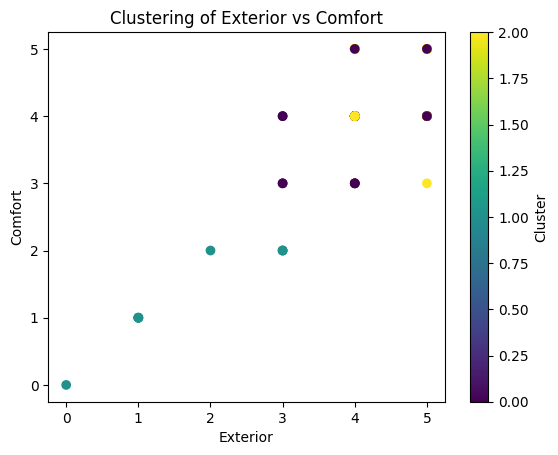

In [167]:
# Visualize the clusters
plt.scatter(df['Exterior'], df['Comfort'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Exterior')
plt.ylabel('Comfort')
plt.title('Clustering of Exterior vs Comfort')
plt.colorbar(label='Cluster')
plt.show()

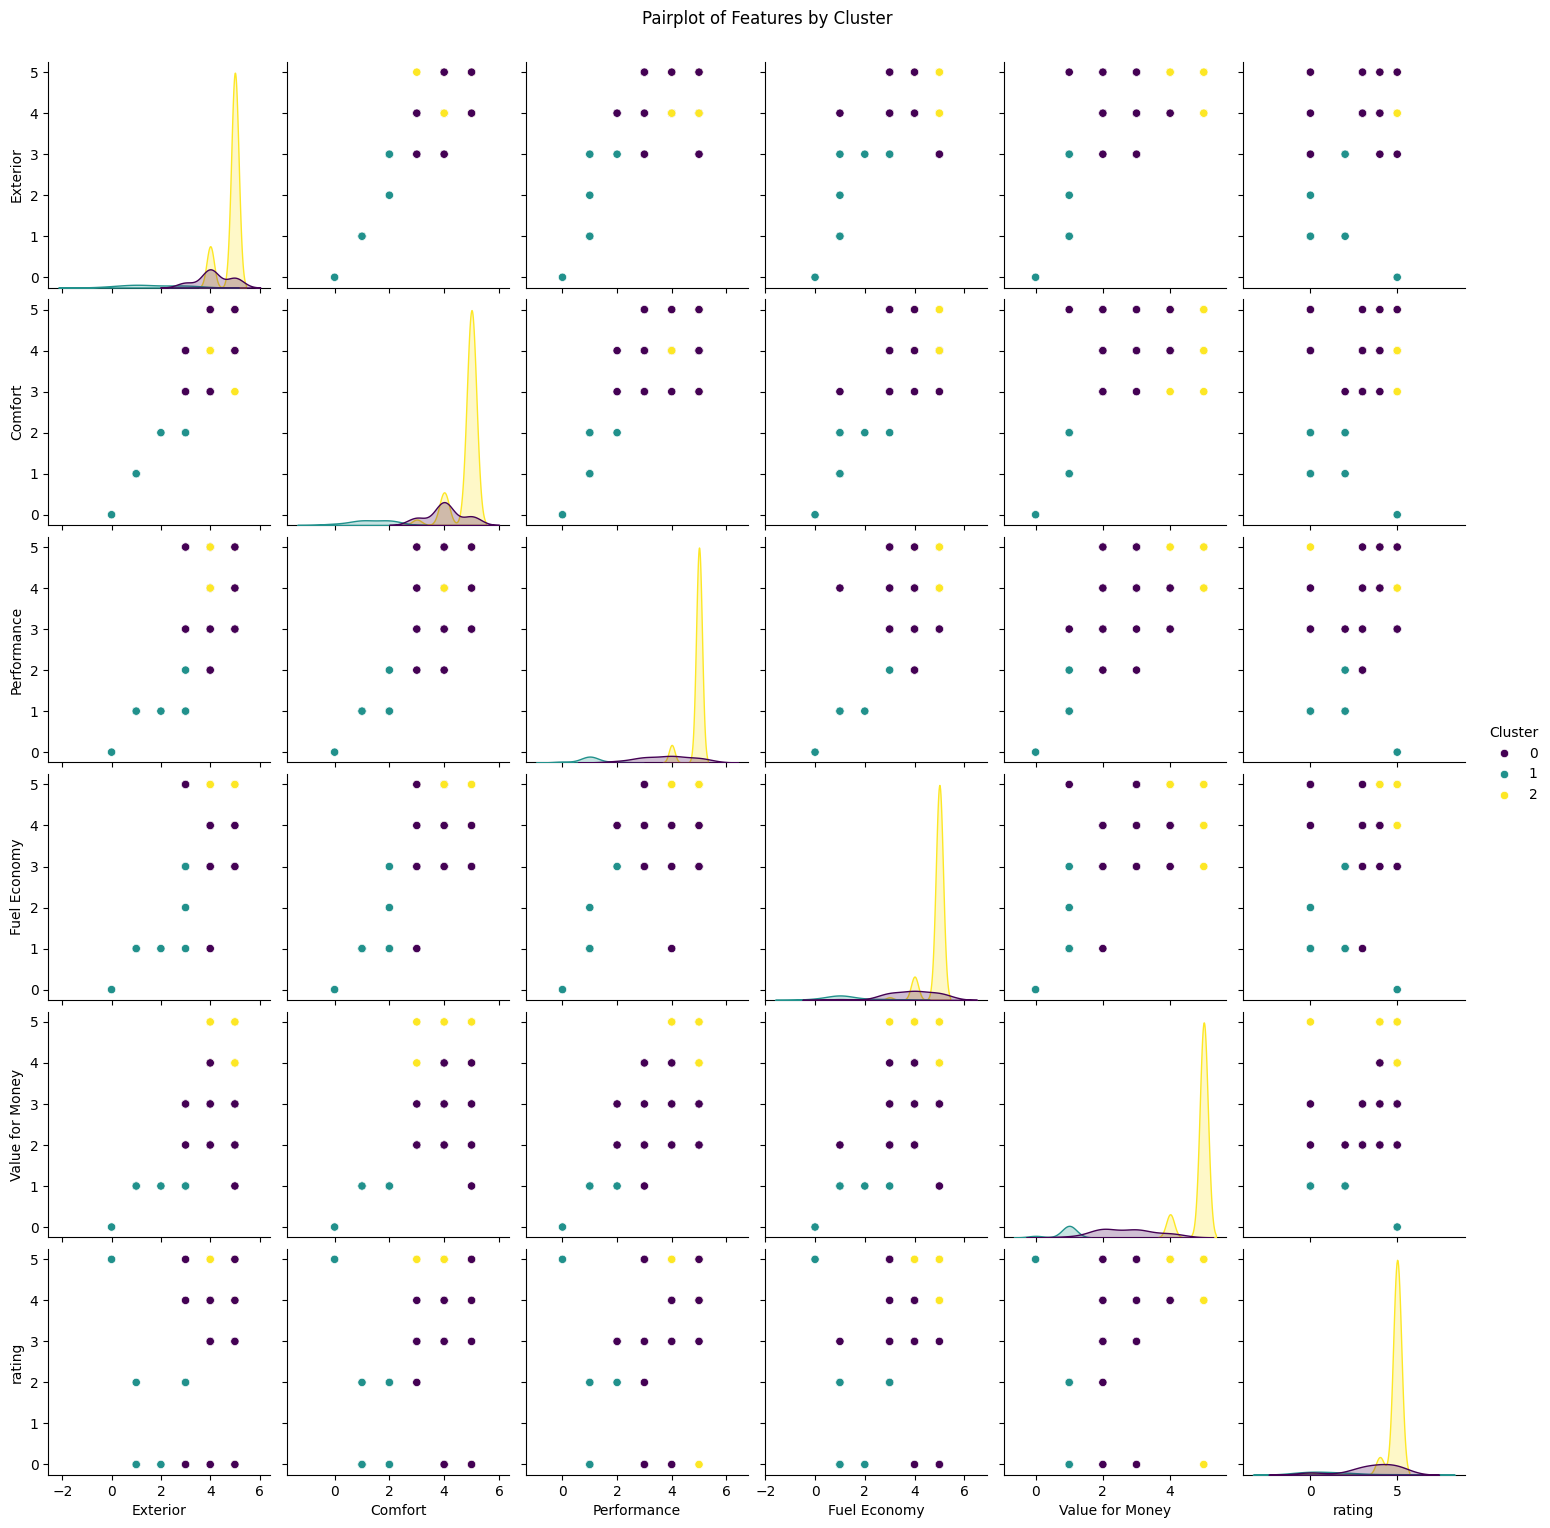

In [168]:
# Pairplot
import seaborn as sns
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()


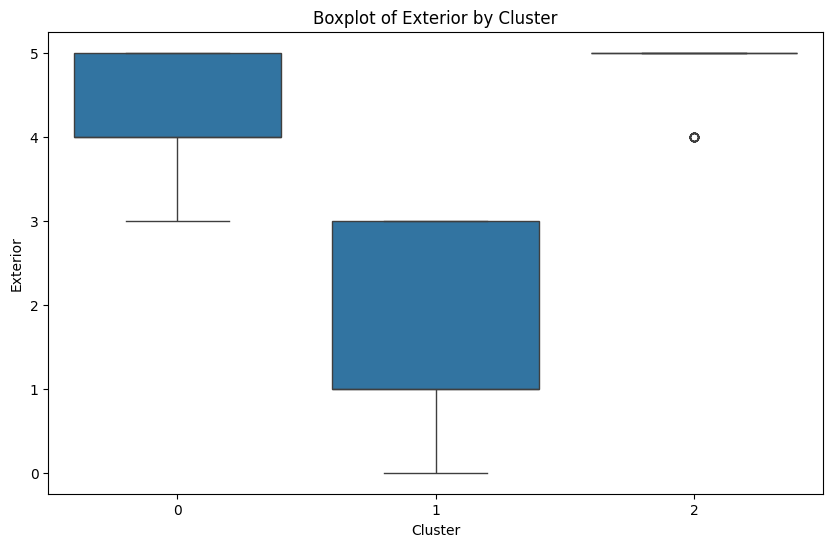

In [169]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Exterior')
plt.xlabel('Cluster')
plt.ylabel('Exterior')
plt.title('Boxplot of Exterior by Cluster')
plt.show()
